<a href="https://colab.research.google.com/github/hadar-g/DataAnalytics/blob/main/Basketball_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this project I want to analyze data on score margins during basketball games
that is the difference between the two teams scores after every given play. As a Warriors fan my data will be made up of warriors 2022 playoffs games, but the methods can be used for any tea

In [ ]:
pip install nba_api


Now I'm importing all the packages I will need

In [22]:
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.endpoints import playbyplay
from nba_api.stats.static import teams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First I want to look at **team data** and pull out the ID we will need to Identify Golden State Warriors Games

In [5]:
nba_teams = pd.DataFrame(teams.get_teams())
nba_teams.head(8)

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
5,1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
6,1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


So we can see that *GSW* are 7th down there and have a unique id so I'll assign a variable to that

In [6]:
GSW_Id = nba_teams.at[7,  "id"]

Now I'm going to use the *Leaguegamefinder* provided by the API to take a look at all the warriors playoffs games so far this season
 

In [205]:
GSW_Games = leaguegamefinder.LeagueGameFinder(season_nullable='2021-22', 
                                              league_id_nullable='00', 
                                              season_type_nullable='Playoffs',
                                              team_id_nullable=GSW_Id).get_data_frames()[0]
GSW_Games.head(10)                                           

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42021,1610612744,GSW,Golden State Warriors,0042100234,2022-05-09,GSW vs. MEM,W,239,101,...,0.909,10,44,54,25,6,7,16,15,3.0
1,42021,1610612744,GSW,Golden State Warriors,0042100233,2022-05-07,GSW vs. MEM,W,241,142,...,0.905,4,34,38,34,5,4,16,24,30.0
2,42021,1610612744,GSW,Golden State Warriors,0042100232,2022-05-03,GSW @ MEM,L,239,101,...,0.778,14,38,52,27,6,2,18,20,-5.0
3,42021,1610612744,GSW,Golden State Warriors,0042100231,2022-05-01,GSW @ MEM,W,239,117,...,0.650,16,36,52,31,10,6,18,25,1.0
4,42021,1610612744,GSW,Golden State Warriors,0042100165,2022-04-27,GSW vs. DEN,W,241,102,...,0.714,6,31,37,28,10,6,9,22,4.0
5,42021,1610612744,GSW,Golden State Warriors,0042100164,2022-04-24,GSW @ DEN,L,241,121,...,0.719,9,27,36,26,15,3,15,27,-5.0
6,42021,1610612744,GSW,Golden State Warriors,0042100163,2022-04-21,GSW @ DEN,W,239,118,...,0.643,4,26,30,29,7,6,16,25,5.0
7,42021,1610612744,GSW,Golden State Warriors,0042100162,2022-04-18,GSW vs. DEN,W,241,126,...,0.708,6,29,35,27,10,8,9,20,20.0
8,42021,1610612744,GSW,Golden State Warriors,0042100161,2022-04-16,GSW vs. DEN,W,241,123,...,0.724,10,29,39,33,5,7,12,22,16.0


Let's pull out the game ID for their third game against memphis because come on, who didn't love watching that game

In [9]:
game_id = GSW_Games.at[1, "GAME_ID"]

I don't know if this is the best method to do this since they seem to push the games to the front so the game id will get shifted later but we'll worry about that another time

now we're going to use the *playbyplay* library provided by the api

In [200]:
pbp =playbyplay.PlayByPlay(game_id).get_data_frames()[0]
pbp.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,SCORE,SCOREMARGIN
0,0042100233,2,12,0,1,8:42 PM,12:00,None,Start of 1st Period (8:42 PM EST),None,None,None
1,0042100233,4,10,0,1,8:42 PM,12:00,Jump Ball Kuminga vs. Jackson Jr.: Tip to Bane,None,None,None,None
2,0042100233,7,1,1,1,8:42 PM,11:34,None,None,Williams 29' 3PT Jump Shot (3 PTS) (Morant 1 AST),3 - 0,-3
3,0042100233,9,5,1,1,8:42 PM,11:18,Green Bad Pass Turnover (P1.T1),None,Morant STEAL (1 STL),None,None
4,0042100233,11,2,79,1,8:42 PM,11:12,None,None,MISS Jackson Jr. 26' 3PT Pullup Jump Shot,None,None


So as you can see, a snapshot of the game gets recorded here during every play. and one of the fields is score which shows both teams score and also the scoremargin which will be the column we focus on

There's some clear issues here, for one on plays where there is no change in score we get a **'NONE'** value which really clutters our results, and for when both teams have the same score instead of the score margin being 0 it's recorded as **'TIE'** so we'll have to cleanup and reformat that data a little bit before continuting.

In [179]:
arr = [[],[],[],[]]
margins =pbp['SCOREMARGIN'].to_dict()
quarters = pbp['PERIOD'].to_dict()
for key in margins:
  if(margins[key] != None):
    if(margins[key] != 'TIE'):
      arr[(int(quarters[key]) - 1)] .append(int(margins[key]))
    else: 
      arr[(int(quarters[key]) - 1)] .append(0)

So heres my hacked together not verry efficent way to do this. I create a 4 dimensional array, one dimension for each quarter, just because I want the quarters in different colors and then maybe later I can run analytics seperately on each quarter.

then I pull the margins and the quarters into dicts, I don't know many, it's the best way I dfound to parse through the data frame from pandas, I'm not very good with pandas and this is the best I could come up with.

In the loop I go through and add the appropriate score margin value based on its quarter, skip it if its **none** and add 0 if its **tie**

So now I have a 4 dimensional array with all the score margins, let;'s checkout a graph.

oh and yes I know I named my array arr, I started using it as a testing variable and now it's too late to change it. generic name it is.

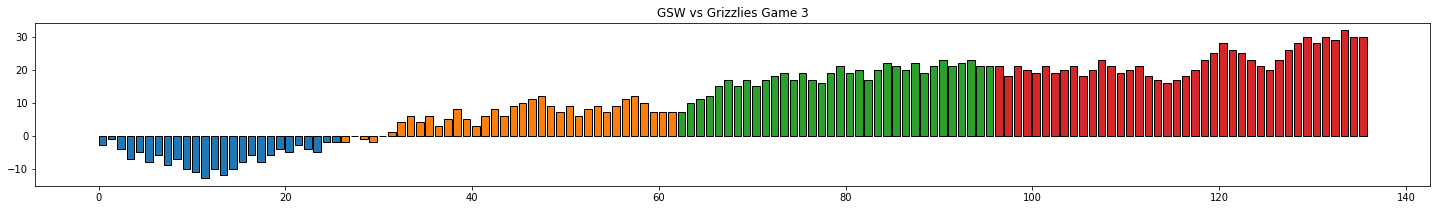

In [181]:
plt.figure(figsize=(25, 3)) 
plt.title('GSW vs Grizzlies Game 3')
plt.bar(range(0,len(arr[0])), arr[0], width=0.8,align='edge', edgecolor='black')
plt.bar(range(len(arr[0]), len(arr[0]) + len(arr[1])), arr[1], width=0.8,align='edge', edgecolor='black')
plt.bar(range(len(arr[0]) + len(arr[1]), len(arr[0]) + len(arr[1]) + len(arr[2])), arr[2], width=0.8,align='edge', edgecolor='black')
plt.bar(range(len(arr[0]) + len(arr[1]) + len(arr[2]), len(arr[0]) + len(arr[1]) + len(arr[2]) + len(arr[3]) ), arr[3], width=0.8,align='edge', edgecolor='black')
plt.show()

Beautiful isn't she? each quarter is a different color, and you can clearly see when the warriors were up and when the warriors were down. Now my next steps would be making this into a generic function and passing in all the game Id's for all the warriors playoff games.

In [182]:
def make_scores_array(Game_Id):
  pbp =playbyplay.PlayByPlay(Game_Id).get_data_frames()[0]
  arr = [[],[],[],[]]
  margins =pbp['SCOREMARGIN'].to_dict()
  quarters = pbp['PERIOD'].to_dict()
  for key in margins:
    if(margins[key] != None):
      if(margins[key] != 'TIE'):
        arr[(int(quarters[key]) - 1)] .append(int(margins[key]))
      else: 
        arr[(int(quarters[key]) - 1)] .append(0)
  return arr

I'm making the array and the graphing two seperate functions because after we have the array we might want to do some analysis on it and what not, plus then I can graph them all at once and look pretty.

In [201]:
def graph_game_by_array(arr, title):
  plt.figure(figsize=(25, 3)) 
  plt.title(title)
  plt.bar(range(0,len(arr[0])), arr[0], width=0.8,align='edge', edgecolor='black')
  plt.bar(range(len(arr[0]), len(arr[0]) + len(arr[1])), arr[1], width=0.8,align='edge', edgecolor='black')
  plt.bar(range(len(arr[0]) + len(arr[1]), len(arr[0]) + len(arr[1]) + len(arr[2])), arr[2], width=0.8,align='edge', edgecolor='black')
  plt.bar(range(len(arr[0]) + len(arr[1]) + len(arr[2]), len(arr[0]) + len(arr[1]) + len(arr[2]) + len(arr[3]) ), arr[3], width=0.8,align='edge', edgecolor='black')
  plt.show()

let's test it out!

In [191]:
game_ids = GSW_Games['GAME_ID'].to_dict()

So now if we wanted to get just the array for a specific game we could call `Game1 = make_scores_array[0]` and we can do all our numerical analysis

Right now I don't particularly care for numerical analysys, I want to see the graphs. Now it has come to my attention that graphs need titles, so i'm going to pull the matchup title and date from the game data frame, maybe theres a way to format it nicely but thats for another time.

In [207]:
game_dates = GSW_Games["GAME_DATE"].to_dict()
game_matchups = GSW_Games["MATCHUP"].to_dict()

Now is finally the moment we've all ben waiting for. Let's pull up all the graphs for the warriors playoffs this season


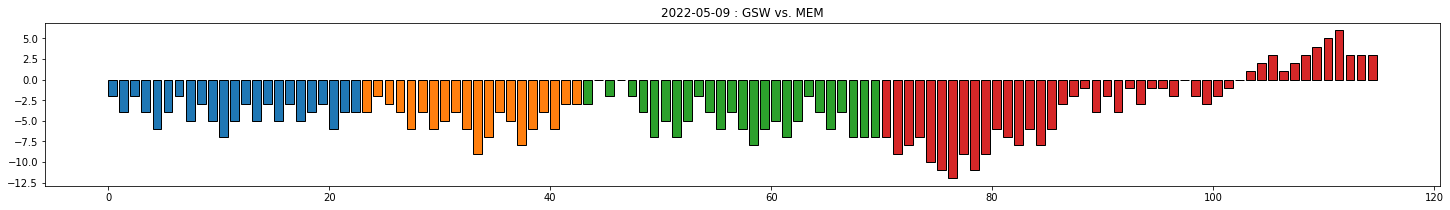

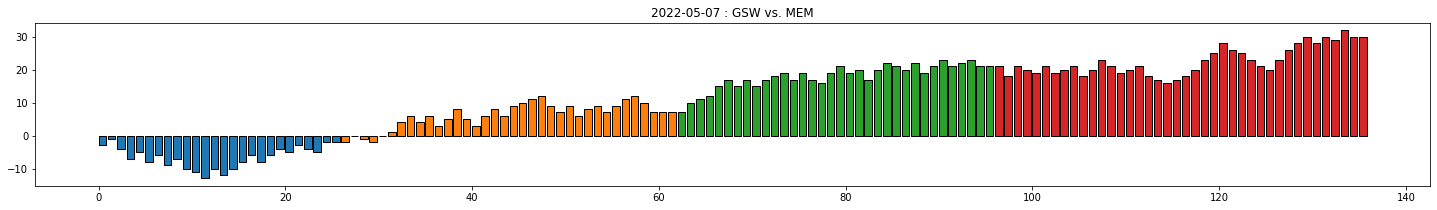

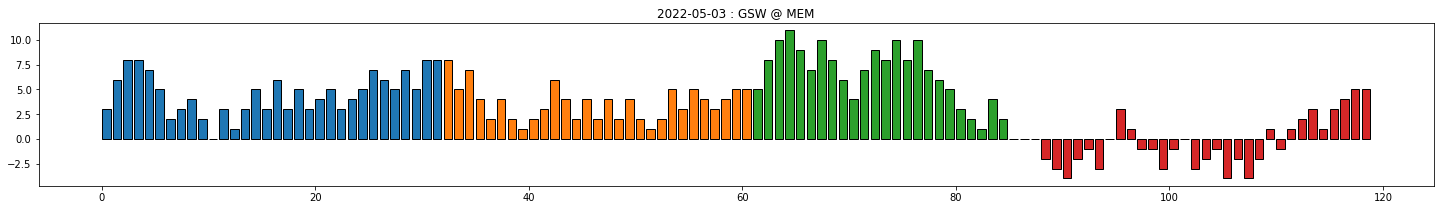

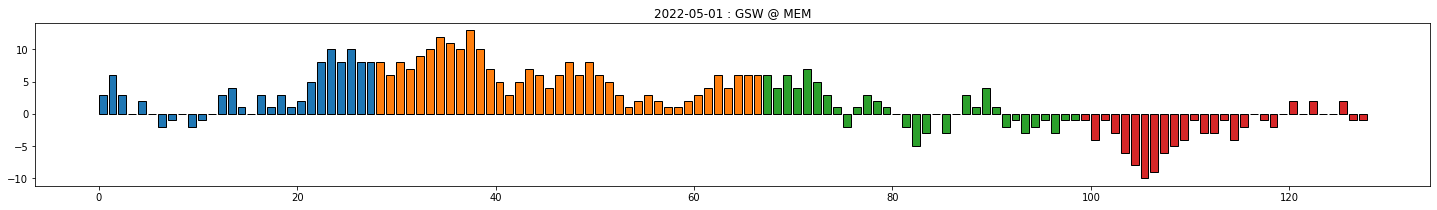

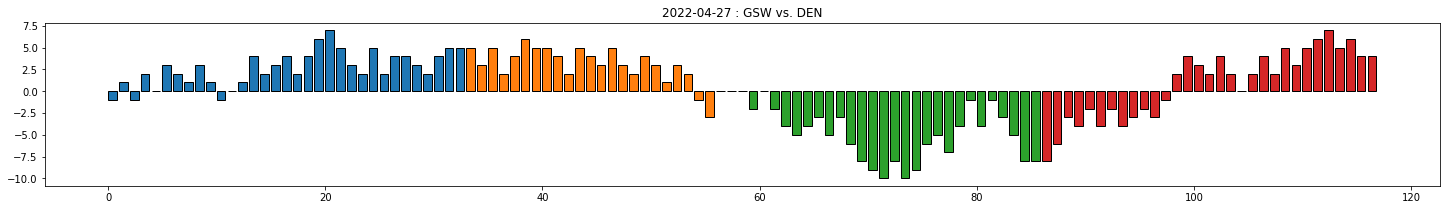

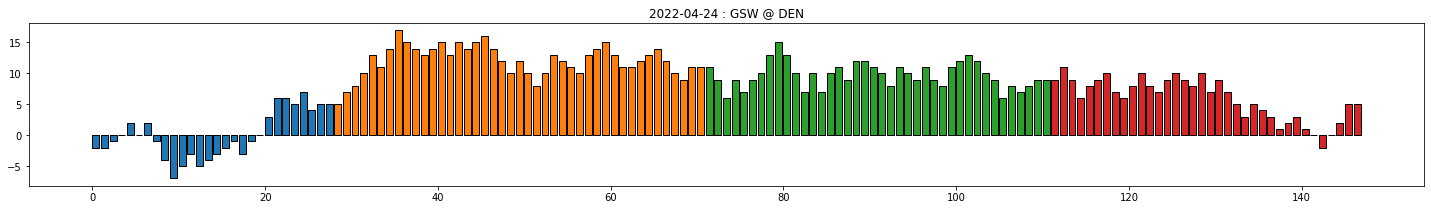

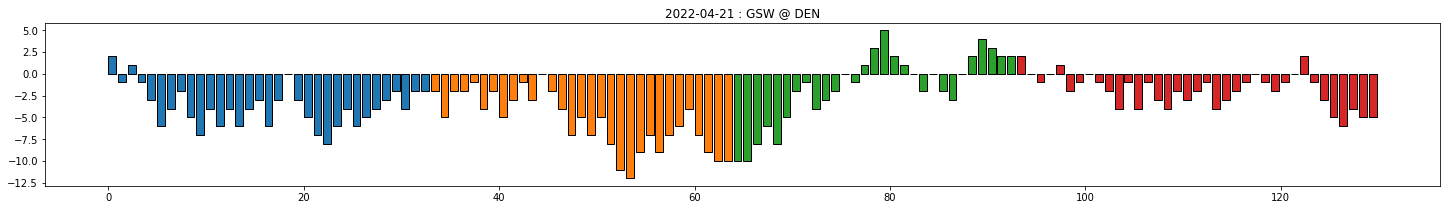

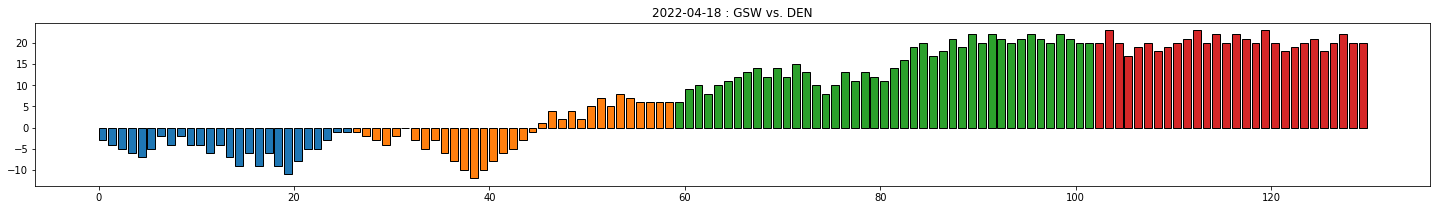

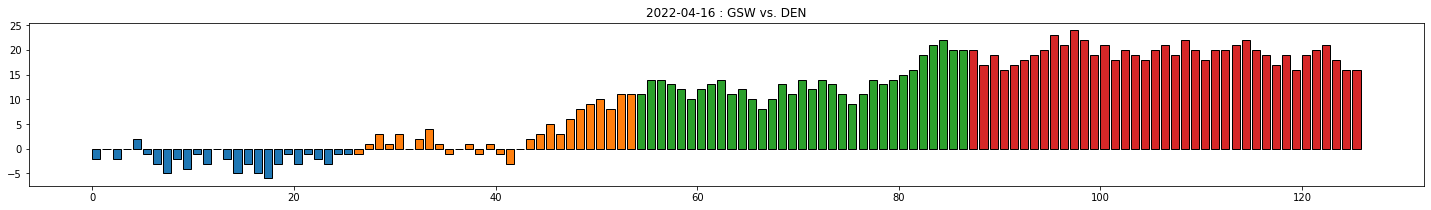

In [213]:
for i in range(0, 9):
  graph_game_by_array(make_scores_array(game_ids[i]), (game_dates[i] + " : " + game_matchups[i]))

Amazing. So are the warriors a 4th quarter team? what do you think? what do you think of the data? what are more things I should analyze with this? let me know at hadar.goldstein@gmail.com